In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn import preprocessing
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture



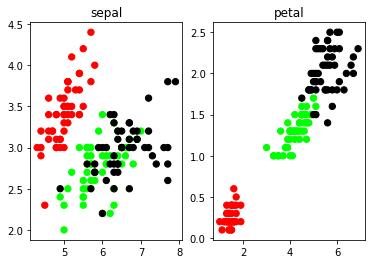

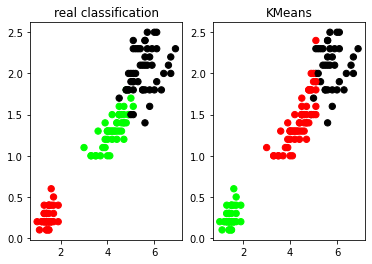

Preidctions  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
accuracy  0.8933333333333333
confusion matrix  [[50  0  0]
 [ 0 48 14]
 [ 0  2 36]]


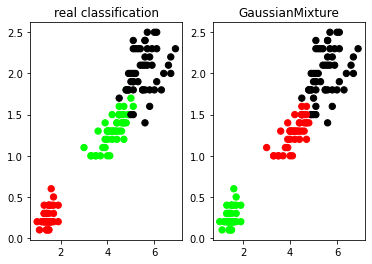

Preidctions  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
accuracy  0.9666666666666667
confusion matrix  [[50  0  0]
 [ 0 45  0]
 [ 0  5 50]]


In [7]:
iris=datasets.load_iris()

l1=[0,1,2]
def rename(s):
    l2=[]
    for i in s:
        if i not in l2:
            l2.append(i)
            
    for i in range(len(s)):
        pos=l2.index(s[i])
        s[i]=l1[pos]
    
    return s

 
X=pd.DataFrame(iris.data,columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'])
y=pd.DataFrame(iris.target,columns=['Targets'])

def graphPlot(l,title,s,target):
    plt.subplot(l[0],l[1],l[2])
    
    if s==1:
        plt.scatter(X.Sepal_Length,X.Sepal_Width,c=colorMap[target],s=40)
    else:
        plt.scatter(X.Petal_Length,X.Petal_Width,c=colorMap[target],s=40)
        
    plt.title(title)

plt.figure()
colorMap=np.array(['red','lime','black'])
graphPlot([1,2,1],'sepal',1,y.Targets)
graphPlot([1,2,2],'petal',0,y.Targets)
plt.show()

def fitModel(modelName):
    model=modelName(3)
    model.fit(X)
    
    plt.figure()
    colorMap=np.array(['red','lime','black'])
    graphPlot([1,2,1],'real classification',0,y.Targets)
    
    y1=model.predict(X)
    
    if(modelName==KMeans):
        m="KMeans"
    else:
        m="GaussianMixture"
    graphPlot([1,2,2],m,0,y1)
    plt.show()
    
    km=rename(y1)
    print("Preidctions ",km)
    print("accuracy ",sm.accuracy_score(km,y))
    print("confusion matrix ",sm.confusion_matrix(km,y))
    
fitModel(KMeans)
fitModel(GaussianMixture)